<a href="https://colab.research.google.com/github/ebelingstar/numerical-methods/blob/main/%D1%87%D0%B8%D1%81%D0%BB%D0%B0%D0%BA%D0%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#числаки_14
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy

print('Эбелинг Анастасия Романовна 5030302/30001 18')
print ("dx1/dt = x2")
print ("dx2/dt = -x1+x2^3")
global number_fun, number_jac #количество вызовов функций и вычислений матрицы Якоби
number_fun = 0
number_jac = 0

def f(t, x):
    global number_fun
    number_fun += 1
    return [x[1], -x[0]+x[1]**3]

sol_bdf_1 = solve_ivp(f, [0, 100], [0.02, 0.02], method='BDF')
print('Количество шагов по времени', len(sol_bdf_1.t))
print('Решение_BDF', sol_bdf_1)
print('Количество вызовов функций', number_fun)
print('Количество вычислений матрицы Якоби', number_jac)

number_fun = number_jac = 0

sol_bdf_2 = solve_ivp(f, [0, 100], [0.1, 0.1], method='BDF', t_eval=np.arange(0, 100, 0.1))
print('Решение_BDF', sol_bdf_2)
print('Количество вызовов функций', number_fun)
print('Количество вычислений матрицы Якоби', number_jac)


number_fun = number_jac = 0

x1 = sympy.Symbol('x1')
x2 = sympy.Symbol('x2')
X = sympy.Matrix([x2, -x1+x2**3])
Y = sympy.Matrix([x1, x2])
J = X.jacobian(Y) #Нашли матрицу Якоби
def Fun_J(t, xx):
    global number_jac
    number_jac += 1
    meaning_x = J.subs([(x1, xx[0]), (x2, xx[1])]) #значение в точке х, значение символьное
    Meaning_x_numeric = meaning_x.applyfunc(lambda x: x.evalf()) #переводим значение матрицы Якоби в численный вид
    Meaning_x_np = np.array(Meaning_x_numeric).astype(np.float64) #Преобразование в NumPy array
    return Meaning_x_np

sol_bdf_j_1 = solve_ivp(f, [0, 100], [0.02, 0.02], jac = Fun_J, method='BDF')
print('Количество шагов по времени', len(sol_bdf_j_1.t))
print('Решение_BDF_J', sol_bdf_j_1)
print('Количество вызовов функций', number_fun)
print('Количество вычислений матрицы Якоби', number_jac)

number_fun = number_jac = 0

sol_bdf_j_2 = solve_ivp(f, [0, 100], [0.1, 0.1], jac = Fun_J, method='BDF', t_eval=np.arange(0, 100, 0.1))
print('Решение_BDF_J', sol_bdf_j_2)
print('Количество вызовов функций', number_fun)
print('Количество вычислений матрицы Якоби', number_jac)

In [ ]:
#числаки_13
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy

print('Эбелинг Анастасия Романовна 5030302/30001 18')
print ("dx1/dt = x2")
print ("dx2/dt = -x1+x2^3")
global number_fun, number_jac #количество вызовов функций и вычислений матрицы Якоби
number_fun = 0
number_jac = 0

def f(t, x):
    global number_fun
    number_fun += 1
    return [x[1], -x[0]+x[1]**3]

sol_rk45_1 = solve_ivp(f, [0, 100], [0.02, 0.02], method='RK45')
print('Решение_КР45', sol_rk45_1)
print('Количество шагов по времени', len(sol_rk45_1.t))
print('Количество вызовов функций', number_fun)
print('Количество вычислений матрицы Якоби', number_jac)

number_fun = number_jac = 0

sol_rk45_2 = solve_ivp(f, [0, 100], [0.1, 0.1], method='RK45', t_eval=np.arange(0, 100, 0.1))
print('Решение_КР45', sol_rk45_2)
print('Количество вызовов функций', number_fun)
print('Количество вычислений матрицы Якоби', number_jac)

fig, ax = plt.subplots(figsize=(6.5, 4))
ax.plot(sol_rk45_1.y[0], sol_rk45_1.y[1], label='data')
ax.plot(sol_rk45_2.y[0], sol_rk45_2.y[1], label='true')
ax.legend(loc='lower left', ncol=2)
plt.show()


In [ ]:
#числаки_12
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import root
from math import cos, sin
import sympy

print('Эбелинг Анастасия Романовна 5030302/30001 18')
print('-cos(x+1)+2*y = 0')
print('x+sin(y)+0.4 = 0')
x = sympy.Symbol('x')
y = sympy.Symbol('y')
X = sympy.Matrix([-sympy.cos(x+1)+2*y, x+sympy.sin(y)+0.4])
Y = sympy.Matrix([x, y])
J = X.jacobian(Y) #Нашли матрицу Якоби
def f(x):
    return [-cos(x[0]+1)+2*x[1], x[0]+sin(x[1])+0.4]
def Fun_J(xx):
    meaning_x = J.subs([(x, xx[0]), (y, xx[1])]) #значение в точке х, значение символьное
    Meaning_x_numeric = meaning_x.applyfunc(lambda x: x.evalf()) #переводим значение матрицы Якоби в численный вид
    Meaning_x_np = np.array(Meaning_x_numeric).astype(np.float64) # Преобразование в NumPy array
    return Meaning_x_np
for i in [1e-3, 1e-4, 1e-5, 1e-6]:
    print('Точность', i)
    solution1 = root(f, [0, 0], tol=i) #нашли х одним способом
    print('Решение без нахождения матрицы Якоби', solution1.get('x'))
    solution2 = root(f, [0, 0], tol=i, jac = Fun_J) #нашли х одним способом
    print('Решение с нахождением матрицы Якоби', solution2.get('x'))
    vector_r = f(solution1.x)
    r = np.linalg.norm(vector_r)
    print('Невязка', r)
    print('Количество итераций', solution1.nfev) #nfev - количество вычислений правой части, njev - количество вычислений матрицы Якоби
    print('Количество итераций, количество вычислений матрицы Якоби', solution2.nfev, solution2.njev)
    #С матрицей Якоби итераций становится меньше


In [ ]:
#числаки_11
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect


print('Эбелинг Анастасия Романовна 5030302/30001 18')
print ('f(x) = ((x-2)**2)*(2**x)-1')
print ('a = -30, b = 1')
x = np.linspace(-30, 1, 100) #100 - количество точек
y = ((x-2)**2)*(2**x)-1 #массив значений
def f(x):
    return (((x-2)**2)*(2**x)-1) #считает все в одной точке
for i in [1e-3, 1e-4, 1e-5, 1e-6]:
    print('Точность', i)
    root, stats = bisect(f, -30, 1, xtol=i, full_output=True) #хтол определяет абсолютную длину интервала, при которой алгоритм останавливается
    print('Значение корня', root)
    r = f(root)
    print('Невязка', r)
    print('Количество итераций', stats.iterations)
    # If full_output is False, the root is returned. If full_output is True, the return value is (x, r),
    # where x is the root, and r is a RootResults object (возвращает количество итераций).
    fig, ax = plt.subplots(figsize=(6.5, 4))
    ax.plot(x, y, label='function')
    ax.plot(root, f(root), 'o', label='root')
    ax.legend(loc='lower left', ncol=2)
    ax.grid()
    plt.show()
    #Количество итераций увеличивается, невязка уменьшается, так как мы требуем большую точность

In [ ]:
#числаки_10
import numpy as np
from scipy.interpolate import splrep, BSpline
import matplotlib.pyplot as plt
from math import cos, pi

print('Эбелинг Анастасия Романовна 5030302/30001 18')
print ('f(x) = x^2*cos(x)')
print('a = -pi, b = pi')
for s in [1, 2, 3, 4, 5]:
    N = [10, 20, 40, 80, 160]
    prev_pog = None
    for i in range(5):
        print('N = ', N[i])
        if  True:
            x = np.linspace(-pi, pi, N[i]+1)  # Этот х - х, по которым строится сплайн
            y = x**2*np.cos(x)
            xs = np.linspace(-pi, pi, 4*N[i]+1)
            ys = xs**2*np.cos(xs)
        find_tck = splrep(x, y, k=s) # находит t - узлы, c - коэффициенты, k - степень
        B_spline = BSpline(*find_tck) # Представление бсплайна в виде кривой
        pog_ap = max([abs(ys[j]-B_spline(xs[j])) for j in range(len(xs))]) # Идем по списку х-ов в 11 строчке, i уже занято
        #тут заголовки таблицы
        # print('Степень k = ', 'Точки разбиения', 'f(x) = ', 'S(x) = ', '|f(x)-S(x)| =')
        # for k in range(len(xs)):
        #     print(s, xs[k], ys[k], B_spline(xs[k]), abs(ys[k]-B_spline(xs[k])))
        # print('Погрешность аппроксимации', pog_ap)
        # fig, ax = plt.subplots(figsize=(6.5, 4))
        # ax.plot(x, y, 'o', label='data')
        # ax.plot(xs, xs**2*np.cos(xs), label='true') # Эти xs нужны для того, чтобы тестировать точки, по которым построился сплайн
        # ax.plot(xs, B_spline(xs), label="S")
        # Погрешность уменьшается, потому что отрезков становится больше и разбиений больше
        # ax.legend(loc='lower left', ncol=2)
        # plt.show()
        pog_uz = max([abs(ys[j]-B_spline(xs[j])) for j in range(len(xs))])
        print('Погрешность в узлах', pog_uz)
        if prev_pog:
            otn_pog = prev_pog/pog_ap
            print('Отношение погрешностей', otn_pog)
        prev_pog = pog_ap

Эбелинг Анастасия Романовна 5030302/30001 18
f(x) = x^2*cos(x)
a = -pi, b = pi
N =  10
Интеграл S =  x**2*sin(x) + 2*x*cos(x) - 2*sin(x)
Аналитически вычисленный интеграл -12.5663706143592
Интеграл от сплайна -12.49753571817635
Погрешность интеграла 0.0688348961828211
Погрешность вычисления 1-й производной 1.00352378495645
Погрешность вычисления 2-й производной 5.30045737263501
Погрешность вычисления 3-й производной 11.4922631978470
Точки разбиения f(x) =  S(x) =  |f(x)-S(x)| =
-3.141592653589793 -9.869604401089358 -9.869604401089358 0.0
-2.9804853380210856 -8.768256540838603 -8.66744800731123 0.10080853352737407
-2.8193780224523786 -7.539814146280806 -7.4293734341756235 0.11044071210518247
-2.658270706883671 -6.256989249814907 -6.186146170488312 0.07084307932659506
-2.497163391314964 -4.985185172437931 -4.9685317050550815 0.016653467382849563
-2.3360560757462565 -3.7803062399512446 -3.807295526681702 0.02698928673045753
-2.174948760177549 -2.687174676211619 -2.7332031241739543 0.04602

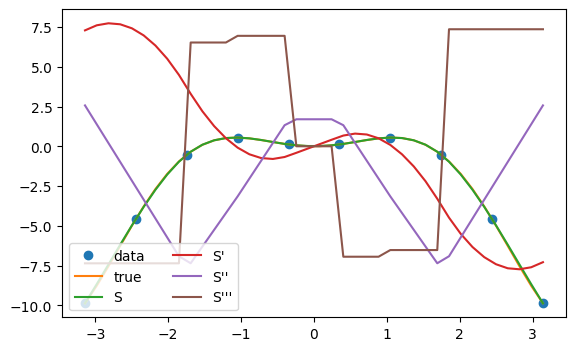

Погрешность в узлах 1.7763568394002505e-15
N =  20
Интеграл S =  x**2*sin(x) + 2*x*cos(x) - 2*sin(x)
Аналитически вычисленный интеграл -12.5663706143592
Интеграл от сплайна -12.565715384820946
Погрешность интеграла 0.000655229538224944
Погрешность вычисления 1-й производной 0.0704550943805708
Погрешность вычисления 2-й производной 0.780367188389636
Погрешность вычисления 3-й производной 3.55505406118626
Точки разбиения f(x) =  S(x) =  |f(x)-S(x)| =
-3.141592653589793 -9.869604401089358 -9.869604401089358 0.0
-3.062058662359672 -9.346563563822246 -9.343134439838318 0.0034291239839276955
-2.9825246711295503 -8.783151356224714 -8.779515139374334 0.0036362168503796255
-2.902990679899429 -8.18860236190405 -8.186441234700027 0.002161127204022506
-2.8234566886693075 -7.5718783958924964 -7.57160746081801 0.00027093507448672227
-2.7439226974391864 -6.941583967931496 -6.942708552730907 0.0011245847994105773
-2.664388706209065 -6.30588911249379 -6.307439245441332 0.0015501329475418046
-2.58485471

In [ ]:
#числаки_9
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from math import pi, cos
from sympy import Integral, Symbol, cos, integrate, Derivative

print('Эбелинг Анастасия Романовна 5030302/30001 18')
print ('f(x) = x^2*cos(x)')
a = -pi
b = pi
print('a = -pi, b = pi')
N = [10, 20, 40, 80, 160]
prev_pog_f = None
prev_pog_int = None
prev_pog_pr = None
for i in range(5):
    print('N = ', N[i])
    x = np.linspace(-pi, pi, N[i])  # Этот х - х, по которым строится сплайн
    y = x**2*np.cos(x)
    xs = np.linspace(-pi, pi, 4*N[i])
    ys = xs**2*np.cos(xs)
    x_int = Symbol('x') #Чтобы считали просто как переменную, неизвестную
    integral_S = integrate(x_int**2*cos(x_int), x_int)
    print('Интеграл S = ', integral_S)
    int_S = Integral(x_int**2*cos(x_int), (x_int, a, b))
    print('Аналитически вычисленный интеграл', int_S.evalf()) #евалф вычисляет
    Cubic_Spline = CubicSpline(x, y) #Задаем множества, по которым будем строить сплайн
    Cubic_Spline_int = Cubic_Spline.integrate(a, b) #Задаем интеграл с пределами
    print('Интеграл от сплайна', Cubic_Spline_int)
    pog_int = abs(int_S.evalf() - Cubic_Spline_int)
    print('Погрешность интеграла', pog_int)
    pog_pr = []
    for k in range(1, 4):
        pog_pr.append(max([abs(Derivative(x_int**2*cos(x_int), x_int, k).doit().evalf(subs={x_int:xs[j]})-Cubic_Spline(xs[j], k)) for j in range(len(xs))]))
        print(f'Погрешность вычисления {k}-й производной', pog_pr[-1])
    pog_ap = max([abs(ys[j]-Cubic_Spline(xs[j])) for j in range(len(xs))]) # Идем по списку х-ов в 16 строчке, i уже занято
    print('Точки разбиения', 'f(x) = ', 'S(x) = ', '|f(x)-S(x)| =')
    for k in range(len(xs)):
         print(xs[k], ys[k], Cubic_Spline(xs[k]), abs(ys[k]-Cubic_Spline(xs[k])))
    print('Погрешность аппроксимации', pog_ap)
    if N[i] == 10:
        fig, ax = plt.subplots(figsize=(6.5, 4))
        ax.plot(x, y, 'o', label='data')
        ax.plot(xs, xs**2*np.cos(xs), label='true') # Эти xs нужны для того, чтобы тестировать точки, по которым построился сплайн
        ax.plot(xs, Cubic_Spline(xs), label="S")
        ax.plot(xs, Cubic_Spline(xs, 1), label="S'")
        ax.plot(xs, Cubic_Spline(xs, 2), label="S''")
        ax.plot(xs, Cubic_Spline(xs, 3), label="S'''")
        # Погрешность уменьшается, потому что отрезков становится больше и полиномов больше
        ax.legend(loc='lower left', ncol=2)
        plt.show()
    pog_uz = max([abs(y[j]-Cubic_Spline(x[j])) for j in range(len(x))])
    print('Погрешность в узлах', pog_uz)
    if N[i]!=10:
        otn_pog_f = prev_pog_f/pog_ap
        print('Отношение погрешностей функции', otn_pog_f)
        otn_pog_int = prev_pog_int/pog_int
        print('Отношение погрешностей интеграла', otn_pog_int)
        for l in range (3):
            otn_pog_pr = prev_pog_pr[l]/pog_pr[l]
            print(f'Отношение погрешностей {l+1}-й производной', otn_pog_pr) #сделали списки, чтобы не заводить переменную для каждой переменной, л+1, тк индексация в списке идет с 0
    prev_pog_f = pog_ap
    prev_pog_int = pog_int
    prev_pog_pr = pog_pr

In [ ]:
#числаки_8
import numpy as np
from scipy.interpolate import CubicSpline
import matplotlib.pyplot as plt
from math import cos, pi

print('Эбелинг Анастасия Романовна 5030302/30001 18')
print ('f(x) = x^2*cos(x)')
print('a = -pi, b = pi')
N = [10, 20, 40, 80, 160]
prev_pog = None
for i in range(5):
    print('N = ', N[i])
    x = np.linspace(-pi, pi, N[i])  # Этот х - х, по которым строится сплайн
    y = x**2*np.cos(x)
    xs = np.linspace(-pi, pi, 4*N[i])
    ys = xs**2*np.cos(xs)
    Cubic_Spline = CubicSpline(x, y)
    pog_ap = max([abs(ys[j]-Cubic_Spline(xs[j])) for j in range(len(xs))]) # Идем по списку х-ов в 11 строчке, i уже занято
    # print('Точки разбиения', 'f(x) = ', 'S(x) = ', '|f(x)-S(x)| =')
    # for k in range(len(xs)):
    #        print(xs[k], ys[k], Cubic_Spline(xs[k]), abs(ys[k]-Cubic_Spline(xs[k])))
    # print('Погрешность аппроксимации', pog_ap)
    if N[i] == 10:
        fig, ax = plt.subplots(figsize=(6.5, 4))
        ax.plot(x, y, 'o', label='data')
        ax.plot(xs, xs**2*np.cos(xs), label='true') # Эти xs нужны для того, чтобы тестировать точки, по которым построился сплайн
        ax.plot(xs, Cubic_Spline(xs), label="S")
        # Погрешность уменьшается, потому что отрезков становится больше и разбиений больше
        ax.legend(loc='lower left', ncol=2)
        plt.show()
    pog_uz = max([abs(y[j]-Cubic_Spline(x[j])) for j in range(len(x))])
    print('Погрешность в узлах', pog_uz)
    if N[i]!=10:
        otn_pog = prev_pog/pog_ap
        print('Отношение погрешностей', otn_pog)
    prev_pog = pog_ap

Вычисление всех собственных чисел и собственных векторов несимметричной матрицы.
 Матрица А и вектор правой части В системы линейных алгебраических уравнений содержатся в файлах RGEmtr038.dat и RGErhs038.dat
 Система уравнений имеет размерность   15
 Параметр P принимает значения P = {  1.0000000  0.0156250  0.0000000 }. Значение Р должно быть прибавлено к A(1,1) и B(1)
 как A(1,1)+p и B(1)+2p

In [ ]:
#числаки_7
import numpy as np
import pandas as pd
import scipy.linalg as sp
from scipy.sparse import dia_matrix, csc_matrix
from scipy.sparse.linalg import norm, inv, spsolve
from scipy.linalg import eigh, eig

print('Эбелинг Анастасия Романовна 5030302/30001 18')

def program(A):
  dfA=pd.DataFrame(A)
  print('матрица А', dfA)
  for i in range(3):
    if i==0:
        P=1.0000000
        print ('Параметр р', P)
    if i==1:
        P=0.0156250
        print ('Параметр р',P)
    if i==2:
        P=0.0000000
        print ('Параметр р',P)
    A[0,0]+=P
    l, x = eig(A)
    list_l=[]
    for i in l:
      list_l.append(f"{i:.1e}")
    print('Собственные значения', list_l)
    print('Собственные векторы', np.array2string(x, max_line_width=1100))
    r=np.array2string((l*x-A@x), max_line_width=1100)
    print('Вектор невязки', r)
    A[0,0]-=P


A1 = np.single(np.loadtxt('/content/RGEmtr038.dat'))
program(A1)

A2 = np.double(np.loadtxt('/content/RGEmtr038.dat'))
program(A2)


Эбелинг Анастасия Романовна 5030302/30001 18
матрица А       0     1     2     3    4    5    6     7    8     9     10    11    12  \
0   30.0   0.0   5.0   2.0 -8.0 -5.0  6.0   2.0  5.0  -5.0  -1.0  -4.0  -7.0   
1   -6.0  17.0  -7.0   0.0  1.0  4.0 -1.0  -7.0  6.0  -3.0   0.0   0.0   7.0   
2    5.0  -5.0  17.0  -6.0  8.0 -5.0 -1.0  -3.0  3.0   7.0  -3.0  -4.0  -5.0   
3    1.0   0.0  -4.0  10.0 -3.0 -4.0 -7.0   1.0  8.0   8.0  -1.0  -1.0  -3.0   
4    3.0  -5.0   2.0  -3.0  9.0  4.0  4.0   7.0 -7.0   1.0   7.0   4.0  -2.0   
5   -8.0  -1.0  -5.0  -1.0  6.0  1.0 -8.0   6.0  5.0   4.0  -4.0   2.0  -1.0   
6    8.0   0.0   4.0  -2.0  0.0  3.0 -2.0   7.0 -1.0   5.0   0.0   2.0   2.0   
7    6.0  -4.0  -7.0   5.0  2.0 -7.0  7.0 -25.0 -1.0   4.0   7.0   5.0  -5.0   
8    0.0  -7.0   8.0   7.0  2.0 -6.0 -3.0   2.0 -8.0   0.0  -1.0   8.0  -7.0   
9   -3.0   0.0   5.0   2.0 -8.0 -7.0  4.0   2.0 -8.0 -12.0  -6.0  -3.0   2.0   
10   0.0  -3.0   1.0   6.0  7.0  8.0  4.0  -3.0 -1.0  -7.0  17.0 

Вычисление всех собственных чисел и собственных векторов симметричной матрицы.
Вариант номер  38.
 Матрица А и вектор правой части В системы линейных алгебраических уравнений содержатся в файлах RSImtr038.dat и RSIrhs038.dat
 Система уравнений имеет размерность   15
 Параметр P принимает значения P = {  1.0000000  0.0156250  0.0000000 }. Значение Р должно быть прибавлено к A(1,1) и B(1)
 как A(1,1)+p и B(1)+6p

In [ ]:
#числаки_6
import numpy as np
import pandas as pd
import scipy.linalg as sp
from scipy.sparse import dia_matrix, csc_matrix
from scipy.sparse.linalg import norm, inv, spsolve
from scipy.linalg import eigh

print('Эбелинг Анастасия Романовна 5030302/30001 18')

def program(A):
  dfA=pd.DataFrame(A)
  print('матрица А', dfA)
  for i in range(3):
    if i==0:
        P=1.0000000
        print ('Параметр р', P)
    if i==1:
        P=0.0156250
        print ('Параметр р',P)
    if i==2:
        P=0.0000000
        print ('Параметр р',P)
    A[0,0]+=P
    l, x = eigh(A)
    list_l=[]
    for i in l:
      list_l.append(f"{i:.1e}")
    print('Собственные значения', list_l)
    print('Собственные векторы', np.array2string(x, max_line_width=1100))
    r=np.array2string((l*x-A@x), max_line_width=1100)
    print('Вектор невязки', r)
    tx = np.transpose(x)
    prove = x@tx
    print('Проверка ортогональности', prove)
    A[0,0]-=P

A1 = np.single(np.loadtxt('/content/RSImtr038.dat'))
program(A1)

A2 = np.double(np.loadtxt('/content/RSImtr038.dat'))
program(A2)


Эбелинг Анастасия Романовна 5030302/30001 18
матрица А       0     1    2     3    4     5     6     7    8     9     10   11   12  \
0  -35.0  -3.0  7.0   3.0  1.0   5.0   5.0   8.0 -8.0  -7.0  -7.0  1.0 -6.0   
1   -3.0 -19.0 -7.0   7.0  5.0   5.0  -4.0  -6.0 -4.0   0.0   5.0 -3.0 -5.0   
2    7.0  -7.0  8.0  -6.0  7.0   0.0   7.0  -7.0  0.0   0.0  -6.0  1.0 -3.0   
3    3.0   7.0 -6.0 -11.0  1.0   7.0  -2.0   0.0 -3.0  -3.0  -3.0  4.0  5.0   
4    1.0   5.0  7.0   1.0  5.0   3.0   1.0  -5.0  0.0   5.0  -3.0  2.0  2.0   
5    5.0   5.0  0.0   7.0  3.0 -26.0  -4.0   3.0  4.0  -8.0  -2.0  3.0  3.0   
6    5.0  -4.0  7.0  -2.0  1.0  -4.0  12.0   3.0  5.0  -6.0  -2.0 -7.0  1.0   
7    8.0  -6.0 -7.0   0.0 -5.0   3.0   3.0 -10.0  0.0  -2.0  -3.0  2.0 -5.0   
8   -8.0  -4.0  0.0  -3.0  0.0   4.0   5.0   0.0 -6.0  -1.0  -5.0 -2.0 -1.0   
9   -7.0   0.0  0.0  -3.0  5.0  -8.0  -6.0  -2.0 -1.0 -15.0   7.0  7.0  0.0   
10  -7.0   5.0 -6.0  -3.0 -3.0  -2.0  -2.0  -3.0 -5.0   7.0 -26.0  6.0 -8.0 

 Вариант номер  18.
 Ненулевые элементы разреженной матрицы А вместе с их строчными и столбцевыми индексами,
 а также вектор правой части В системы линейных
 алгебраических уравнений содержатся в файлах RGSmtr018.dat и RGSrhs018.dat
 Система уравнений имеет размерность   29
 Число ненулевых элементов матрицы    162
 Параметр P принимает значения P = {  1.0000000  0.0156250  0.0000000 }. Значение Р должно быть прибавлено к A(1,1) и B(1)
 как A(1,1)+p и B(1)+3p

 Решение систем линейных алгебраических уравнений с квадратными разреженными
матрицами общего вида.

In [ ]:
#числаки_5
from operator import sub
import pandas as pd
import numpy as np
import scipy.linalg as sp
from scipy.sparse import dia_matrix, csc_matrix
from scipy.sparse.linalg import norm, inv, spsolve

print('Эбелинг Анастасия Романовна 5030302/30001 18')

xx=[]
def program(A, B):
  dfA=pd.DataFrame(A)
  dfB=pd.DataFrame(B)
  print('матрица А', dfA)
  print('матрица В', dfB)
  C = csc_matrix((A[:, 2],(A[:, 0]-1, A[:, 1]-1)), shape = (29, 29)).tocsc()
  for i in range(3):
    if i==0:
        P=1.0000000
        print ('параметр р', P)
    if i==1:
        P=0.0156250
        print ('параметр р',P)
    if i==2:
        P=0.0000000
        print ('параметр р',P)
    C[0,0]+=P
    B[0]+=3*P
    x = spsolve(C, B)
    xx.append(x)
    print('решение', x)
    ob=norm(C)*norm(inv(C))
    print('число обусловленности', f"{ob:e}")
    print('оценка обраной величины числа обусловленности', f"{1/ob:e}")
    r=B-C.dot(x)
    print('вектор невязки', r)
    r1=np.linalg.norm(r,ord=1)
    B1=np.linalg.norm(B,ord=1)
    pog=ob*(r1/B1)
    print('погрешность', f"{pog:e}")
    C[0,0]-=P
    B[0]-=3*P

A1 = np.single(np.loadtxt('/content/RGSmtr018.dat'))
B1 = np.single(np.loadtxt('/content/RGSrhs018.dat'))
program(A1, B1)

A2 = np.double(np.loadtxt('/content/RGSmtr018.dat'))
B2 = np.double(np.loadtxt('/content/RGSrhs018.dat'))
program(A2, B2)

print("Разница:")
print(xx[0]-xx[1])
print(xx[2]-xx[3])
print(xx[4]-xx[5])

Эбелинг Анастасия Романовна 5030302/30001 18
матрица А         0     1     2
0     1.0   1.0 -16.0
1     4.0   1.0  -2.0
2    12.0   1.0  -2.0
3    14.0   1.0  -4.0
4    20.0   1.0   6.0
..    ...   ...   ...
157  27.0  28.0   3.0
158  28.0  28.0   5.0
159  29.0  28.0   5.0
160  18.0  29.0  -8.0
161  29.0  29.0  -2.0

[162 rows x 3 columns]
матрица В         0
0    56.0
1    64.0
2    10.0
3   -79.0
4    64.0
5  -229.0
6    61.0
7     4.0
8   141.0
9    28.0
10   72.0
11  -20.0
12  146.0
13  -36.0
14   42.0
15   38.0
16   36.0
17  -58.0
18  -14.0
19   69.0
20   43.0
21  -12.0
22   53.0
23   54.0
24  169.0
25   37.0
26  -28.0
27   30.0
28   30.0
параметр р 1.0
решение [ 3.00002813e+00 -2.70022683e-05  5.99997091e+00  7.99997044e+00
  2.99997306e+00  6.99997330e+00  5.00002623e+00  7.00003290e+00
  7.99997330e+00  9.99972701e-01  6.99997139e+00  2.99997211e+00
  6.00002861e+00  5.99997139e+00  2.00002599e+00  7.00002527e+00
  2.00002789e+00  1.00002480e+00  3.99997139e+00 -2.55107880e-05

  4 Вариант номер  18.
 Вещественная симметричеая положительно-определённая ленточная матрица размерности =  26
 Число нижних кодиагоналей матрицы          =   3
 Число верхних кодиагоналей матрицы         =   3
 Верхние кодиагонали и главная диагональ матрицы А,
 а также вектор правой части В системы линейных
 алгебраических уравнений содержатся в файлах RPBmtr018.dat и RPBrhs018.dat
 Параметр P принимает значения P = {  1.0000000  0.0156250  0.0000000 }. Значение Р должно быть прибавлено к A(1,1) и B(1)
 как A(1,1)+p и B(1)+1p

 Решение систем линейных алгебраических уравнений с квадратными симметричными
ленточными положительно-определёнными матрицами.

In [ ]:
#числаки_4
import numpy as np
import pandas as pd
import scipy.linalg as sp
from scipy.sparse import dia_matrix
from scipy.sparse.linalg import norm, inv

print('Эбелинг Анастасия Романовна 5030302/30001 18')

def program(A, B):
  dfA=pd.DataFrame(A)
  dfB=pd.DataFrame(B)
  print('матрица А', dfA)
  print('матрица В', dfB)
  for i in range(3):
    if i==0:
        P=1.0000000
        print ('параметр р', P)
    if i==1:
        P=0.0156250
        print ('параметр р', P)
    if i==2:
        P=0.0000000
        print ('параметр р', P)
    A[3,0]+=P
    B[0]+=1*P
    l=sp.cholesky_banded(A)
    x = sp.cho_solve_banded((l, False), B)
    print('решение', x)
    C = np.zeros((7, 26))
    for i in range(len(A)):
        C[i] = A[i]
    C[4][:len(A[1])-1:] = A[1][1::]
    C[5][:len(A[1])-2:] = A[0][2::]
    C[6][:len(A[1])-3:] = A[0][3::]
    dfC=pd.DataFrame(C)
    print ('матрица С', dfC)
    offsets=np.array([3, 2, 1, 0, -1, -2, -3])
    sparse_A = dia_matrix((C, offsets), shape = (26, 26)).tocsc()
    ob=norm(sparse_A)*norm(inv(sparse_A))
    print('оценка числа обусловленности', f"{ob:e}")
    print('оценка обраной величины числа обусловленности', f"{1/ob:e}")
    r=B-sparse_A.dot(x)
    print('вектор невязки', r)
    r1=np.linalg.norm(r,ord=1)
    B1=np.linalg.norm(B,ord=1)
    pog=ob*(r1/B1)
    print('погрешность', f"{pog:e}")
    A[3,0]-=P
    B[0]-=1*P

A1 = np.single(np.loadtxt('/content/RPBmtr018.dat'))
B1 = np.single(np.loadtxt('/content/RPBrhs018.dat'))
program(A1, B1)

A2 = np.double(np.loadtxt('/content/RPBmtr018.dat'))
B2 = np.double(np.loadtxt('/content/RPBrhs018.dat'))
program(A2, B2)


Эбелинг Анастасия Романовна 5030302/30001 18
матрица А      0     1     2     3     4     5     6     7     8     9   ...    16  \
0   0.0   0.0   0.0  -5.0  -3.0  -6.0  -7.0  -8.0  -2.0  -5.0  ...  -2.0   
1   0.0   0.0  -5.0  -3.0  -3.0  -7.0  -3.0  -1.0  -8.0   0.0  ...  -5.0   
2   0.0  -8.0  -1.0   0.0  -1.0  -1.0  -8.0  -2.0  -4.0  -8.0  ...   0.0   
3  18.0  15.0  15.0  23.0  19.0  25.0  33.0  17.0  30.0  25.0  ...  19.0   

     17    18    19    20    21    22    23    24   25  
0  -8.0  -9.0  -2.0  -7.0  -8.0  -6.0  -8.0  -2.0 -2.0  
1  -6.0  -4.0  -5.0  -5.0  -2.0  -2.0  -6.0  -8.0 -2.0  
2  -6.0  -1.0  -2.0  -7.0  -4.0  -5.0  -1.0  -4.0 -4.0  
3  33.0  29.0  24.0  33.0  27.0  24.0  21.0  18.0  8.0  

[4 rows x 26 columns]
матрица В         0
0   -67.0
1    51.0
2    86.0
3   -38.0
4   -68.0
5  -109.0
6   163.0
7    -8.0
8   -20.0
9    32.0
10   50.0
11    2.0
12  -51.0
13  -56.0
14  135.0
15 -183.0
16 -113.0
17  150.0
18  191.0
19  -15.0
20  -64.0
21  -90.0
22  -16.0
23   6

 3 Вариант номер  18.
 Вещественная ленточная матрица размерности =  29
 Число нижних кодиагоналей матрицы          =   1
 Число верхних кодиагоналей матрицы         =   2
 Верхние кодигонали, главная диагональ и нижние кодиагонали матрица А,
 а также вектор правой части В системы линейных алгебраических уравнений содержатся в файлах RGBmtr018.dat и RGBrhs018.dat
 Параметр P принимает значения P = {  1.0000000  0.0156250  0.0000000 }. Значение Р должно быть прибавлено к A(1,1) и B(1)
 как A(1,1)+p и B(1)+8p

 Решение систем линейных алгебраических уравнений с квадратными ленточными
матрицами общего вида.

In [ ]:
#числаки_3
import pandas as pd
import numpy as np
import scipy.linalg as sp
from scipy.sparse import dia_matrix
from scipy.sparse.linalg import norm, inv

print('Эбелинг Анастасия Романовна 5030302/30001 18')

def program(A, B):
  dfA=pd.DataFrame(A)
  dfB=pd.DataFrame(B)
  print('матрица А', dfA)
  print('матрица В', dfB)
  for i in range(3):
    if i==0:
        P=1.0000000
        print ('параметр р', P)
    if i==1:
        P=0.0156250
        print ('параметр р', P)
    if i==2:
        P=0.0000000
        print ('параметр р', P)
    A[3,1]+=P
    B[0]+=6*P
    x = sp.solve_banded((3, 2), A, B)
    offsets=np.array([2, 1, 0, -1, -2, -3])
    sparse_A = dia_matrix((A, offsets), shape = (23,23)).tocsc()
    ob=norm(sparse_A)*norm(inv(sparse_A))
    print('оценка числа обусловленности', f"{ob:e}")
    print('оценка обраной величины числа обусловленности', f"{1/ob:e}")
    r=B-sparse_A@x
    print('вектор невязки', r)
    print('решение', x)
    r1=np.linalg.norm(r,ord=1)
    B1=np.linalg.norm(B,ord=1)
    pog=ob*(r1/B1)
    print('погрешность', f"{pog:e}")
    A[3,1]-=P
    B[0]-=6*P

A1 = np.single(np.loadtxt('/content/RGBmtr009.dat'))
B1 = np.single(np.loadtxt('/content/RGBrhs009.dat'))
program(A1, B1)

A2 = np.double(np.loadtxt('/content/RGBmtr009.dat'))
B2 = np.double(np.loadtxt('/content/RGBrhs009.dat'))
program(A2, B2)

Эбелинг Анастасия Романовна 5030302/30001 18
матрица А      0     1     2     3     4     5     6     7     8     9   ...    13  \
0   0.0   0.0  -9.0  -4.0  -8.0  -3.0  -4.0  -7.0  -3.0  -9.0  ...  -3.0   
1   0.0  -4.0  -4.0  -7.0  -8.0  -5.0  -2.0  -3.0  -7.0  -7.0  ...   0.0   
2  13.0  12.0  20.0  31.0  13.0  26.0  18.0  32.0  22.0  19.0  ...  24.0   
3  -4.0  -4.0  -8.0  -1.0  -6.0  -3.0  -2.0  -1.0  -3.0  -3.0  ...  -3.0   
4  -1.0  -5.0  -1.0  -4.0  -3.0  -5.0  -3.0  -2.0  -6.0  -1.0  ...  -4.0   
5  -7.0  -2.0  -7.0  -6.0  -9.0  -7.0  -6.0  -8.0  -2.0  -9.0  ...  -2.0   

     14    15    16    17    18    19    20    21    22  
0  -3.0  -2.0  -2.0  -8.0  -4.0  -3.0  -3.0  -4.0  -4.0  
1  -7.0  -4.0   0.0   0.0  -1.0  -5.0  -8.0  -4.0  -5.0  
2  25.0  25.0  19.0  14.0  24.0  25.0  23.0  24.0  17.0  
3  -8.0  -8.0  -6.0  -1.0  -7.0  -5.0  -3.0  -8.0   0.0  
4  -5.0  -1.0  -7.0  -1.0  -8.0  -8.0  -6.0   0.0   0.0  
5  -3.0  -8.0  -5.0  -2.0  -8.0  -3.0   0.0   0.0   0.0  

[6 ro

RuntimeError: Factor is exactly singular

 2 Вариант номер  18.
 Матрица А и вектор правой части В системы линейных алгебраических уравнений содержатся в файлах RSImtr018.dat и RSIrhs018.dat
 Система уравнений имеет размерность   16
 Параметр P принимает значения P = {  1.0000000  0.0156250  0.0000000 }. Значение Р должно быть прибавлено к A(1,1) и B(1)
 как A(1,1)+p и B(1)+5p

 Решение систем линейных алгебраических уравнений с квадратными симметричными
матрицами.

In [ ]:
#числаки_2
import pandas as pd
import numpy as np
import torch as py
from scipy.sparse.linalg import norm, inv
import torch.linalg as py1
from scipy.sparse import dia_matrix, coo_array

print('Эбелинг Анастасия Романовна 5030302/30001 18')

def program(A, B):
  dfA=pd.DataFrame(A)
  dfB=pd.DataFrame(B)
  print('матрица А', dfA)
  print('матрица В', dfB)
  for i in range(3):
    if i==0:
        P=1.0000000
        print ('параметр р', P)
    if i==1:
        P=0.0156250
        print ('параметр р', P)
    if i==2:
        P=0.0000000
        print ('параметр р', P)
    A = py.from_numpy(A)
    B = py.from_numpy(B)
    B = B.reshape(16, 1)
    A[0,0]+=P
    B[0]+=5*P
    l, s, vh = py1.svd(A, full_matrices = False)
    y = py.mm(l.t(), B)
    z = py.mm(py.diag(1 / s), y)
    x = py.mm(vh.t(), z)
    print("решение", x)
    x=x.numpy()
    A=A.numpy()
    B=B.numpy()
    ob=np.linalg.cond(A)
    print('оценка числа обусловленности', f"{ob:e}")
    print('оценка обраной величины числа обусловленности', f"{1/ob:e}")
    r=B-A@x
    print('вектор невязки', r)
    r1=np.linalg.norm(r,ord=1)
    B1=np.linalg.norm(B,ord=1)
    pog=ob*(r1/B1)
    print('погрешность', f"{pog:e}")
    A[0,0]-=P
    B[0]-=5*P


A1 = np.single(np.loadtxt('/content/RSImtr018.dat'))
B1 = np.single(np.loadtxt('/content/RSIrhs018.dat'))
program(A1, B1)

A2 = np.double(np.loadtxt('/content/RSImtr018.dat'))
B2 = np.double(np.loadtxt('/content/RSIrhs018.dat'))
program(A2, B2)

Эбелинг Анастасия Романовна 5030302/30001 18
матрица А      0    1     2     3    4    5     6    7     8     9    10   11    12  \
0   7.0  4.0   6.0  -1.0 -6.0  7.0   1.0 -8.0   0.0  -2.0  0.0  0.0   4.0   
1   4.0 -5.0   0.0  -3.0  8.0 -7.0   0.0  4.0   0.0   7.0  3.0 -2.0   2.0   
2   6.0  0.0  13.0   3.0  6.0 -7.0   0.0  2.0  -6.0  -1.0  1.0  1.0   2.0   
3  -1.0 -3.0   3.0 -21.0 -4.0  7.0  -7.0  3.0   3.0  -3.0  5.0  4.0   6.0   
4  -6.0  8.0   6.0  -4.0  0.0  7.0  -7.0 -6.0   1.0  -8.0  0.0  3.0  -8.0   
5   7.0 -7.0  -7.0   7.0  7.0  5.0  -7.0 -4.0   3.0   6.0  3.0  8.0  -6.0   
6   1.0  0.0   0.0  -7.0 -7.0 -7.0 -17.0  5.0   1.0   3.0 -1.0  2.0  -5.0   
7  -8.0  4.0   2.0   3.0 -6.0 -4.0   5.0  0.0   5.0  -2.0  3.0  0.0  -2.0   
8   0.0  0.0  -6.0   3.0  1.0  3.0   1.0  5.0  23.0  -6.0 -8.0  3.0  -2.0   
9  -2.0  7.0  -1.0  -3.0 -8.0  6.0   3.0 -2.0  -6.0 -57.0 -7.0  0.0  -2.0   
10  0.0  3.0   1.0   5.0  0.0  3.0  -1.0  3.0  -8.0  -7.0 -1.0  6.0   6.0   
11  0.0 -2.0   1.0   

 Вариант номер  16.
 Матрица А и вектор правой части В системы линейных алгебраических уравнений содержатся в файлах RGEmtr016.dat и RGErhs016.dat
 Система уравнений имеет размерность   24
 Параметр P принимает значения P = {  1.0000000  0.0156250  0.0000000 }. Значение Р должно быть прибавлено к A(1,1) и B(1)
 как A(1,1)+p и B(1)+3p


In [ ]:
#числаки_1
import numpy as np
import pandas as pd
import scipy.linalg as sp

print('Эбелинг Анастасия Романовна 5030302/30001 16')

def program(A, B):
  print('матрица А', A)
  print('матрица В', B)
  for i in range(3):
    if i==0:
        P=1.0000000
        print ('параметр р', P)
    if i==1:
        P=0.0156250
        print ('параметр р',P)
    if i==2:
        P=0.0000000
        print ('параметр р',P)
    A[0,0]+=P
    B[0]+=3*P
    lu, piv = sp.lu_factor(A)
    x = sp.lu_solve((lu, piv), B)
    ob=np.linalg.cond(A)
    print('оценка числа обусловленности', f"{ob:e}")
    print('оценка обраной величины числа обусловленности', f"{1/ob:e}")
    r=B-A@x
    print('вектор невязки', r)
    print('решение', x)
    r1=np.linalg.norm(r,ord=1)
    B1=np.linalg.norm(B,ord=1)
    pog=ob*(r1/B1)
    print('погрешность', f"{pog:e}")
    A[0,0]-=P
    B[0]-=3*P

A1 = np.single(np.loadtxt('/content/RGEmtr016.dat'))
B1 = np.single(np.loadtxt('/content/RGErhs016.dat'))
program(A1, B1)

A2 = np.double(np.loadtxt('/content/RGEmtr016.dat'))
B2 = np.double(np.loadtxt('/content/RGErhs016.dat'))
program(A2, B2)


Эбелинг Анастасия Романовна 5030302/30001 16
матрица А [[ 27.   4.  -2.  -6.   2.  -6.  -8.   3.  -5.  -1.  -3.  -5.   6.   4.
    6.   8.   4.   6.   7.   1.  -5.  -1.  -2.   0.]
 [  8.  -4.   5.  -5.  -2.   7.  -6.   3.   0.  -5.  -3.   7.   3.   7.
   -8.  -1.  -2.  -3.  -4.  -2.   5.  -2.   2.   2.]
 [  5.   0.  34.  -1.  -5.   2.   2.  -5.  -8.  -5.   0.  -8.  -2.   7.
    5.  -5.   5.  -8.   1.  -2.   1.   8.   6.  -1.]
 [  4.   5.  -4. -22.  -4.  -3.   0.   1.   7.  -2.   5.   6.   5.   4.
   -5.  -3.   3.  -3.   0.   0.   5.  -6.   1.   0.]
 [ -5.  -1.  -5.   8. -29.   7.   7.   1.   8.   0.   6.  -3.  -4.   0.
    5.  -7.   6.  -6.  -2.  -4.   5.   1.  -8.  -2.]
 [  6.   3.   5.  -5.   6.  67.   5.   6.   0.   1.   2.   8.   4.   5.
    4.  -8.  -3.   5.  -5.  -8.  -2.  -3.   7.   2.]
 [ -1.   0.  -2.   3.   0.   0. -15.  -8.  -3.   6.   3.  -6.  -3.  -5.
    7.  -7.  -3.   0.  -5.  -2.  -2.  -3.   7.   7.]
 [ -6.  -4.   7.  -8.  -2.   0.  -4.   0.  -5.   7.   2.  -8.  -4.  -2